### **图像模板匹配**

如果两幅不同的模板图像具有相同的直方图分布特性，则反向投影结果不具有参考意义

可以通过比较图像像素的形式来搜索是否存在相同的内容，通过比较像素灰度值来寻找相同内容的方法叫做图像模板匹配，常用于**在一幅图像中寻找特定内容**，利用滑动窗口

如果image尺寸为W * H ，模板图像的尺寸为w * h，则输出图像的尺寸为(W-w+1)*(H-h+1)

模板匹配方法可以选择的标志有：
* cv.TM_SQDIFF 平方差匹配法，利用平方差进行匹配，完全匹配时计算值为0，两者匹配度越低，计算值越大
* cv.TM_SQDIFF_NORMED 归一化平方差配平法，使得输入结果归一化为0~1，当模板与滑动完全匹配时，计算值为0，两者匹配度越低，计算值越大
* cv.TM_CCORR 相关匹配法，采用模板和图像间的乘法操作，数值越大匹配效果越好，0为最坏的匹配结果
* cv.TM_CCORR_NORMED 归一化相关匹配法，使得输入结果归一化为0~1，当模板与滑动完全匹配时，计算值为1，两者完全不匹配时为0
* cv.TM_CCOEFF 系数匹配法，采用相关匹配法对模板减去均值的结果和原图像减去均值的结果进行匹配，可以很好地解决模板图像和原图像之间犹豫亮度不同产生的影响，匹配度越高，计算值越大
* cv.TM_CCOEFF_NORMED 归一化系数匹配法，使得输入结果归一化为1~-1，当模板与滑动完全匹配时，计算值为1，两者完全不匹配时为-1

函数返回的结果是由相关性系数的矩阵，需要寻找输入矩阵中的最大值或最小值，再确定模板匹配的结果，但得到的只是一个像素，需要以该像素作为矩形区域的**左上角**，绘制与模板图像同尺寸的矩形框标出最终匹配结果

In [1]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [2]:
# 读取图像并判断是否读取成功
image = cv.imread(rootpath +'matchTemplate.jpg')
image1 = image.copy()
template = cv.imread(rootpath +'match_template.jpg')
if image is None or template is None:
    print('Failed to read matchTemplate.jpg or match_template.jpg')
    sys.exit


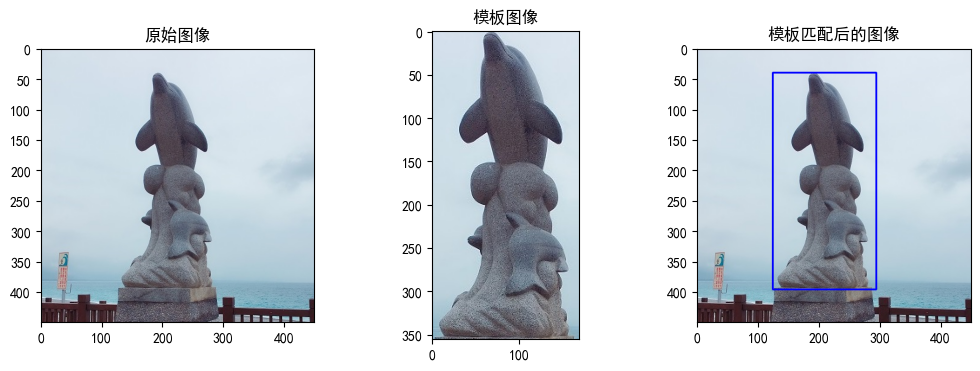

In [3]:
# 计算模板图像的高和宽
h, w = template.shape[:2]
# 进行图像模式匹配
result = cv.matchTemplate(image, template, method=cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
# 计算图像左上角、右下角坐标并画出匹配位置
left_top = max_loc
right_bottom = (left_top[0] + w, left_top[1] + h)
cv.rectangle(image, left_top, right_bottom, 255, 2)
# 展示结果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(image1[:,:,[2,1,0]])
plt.subplot(1, 3, 2)
plt.title('模板图像')
plt.imshow(template[:,:,[2,1,0]])
plt.subplot(1, 3, 3)
plt.title('模板匹配后的图像')
plt.imshow(image[:,:,[2,1,0]])

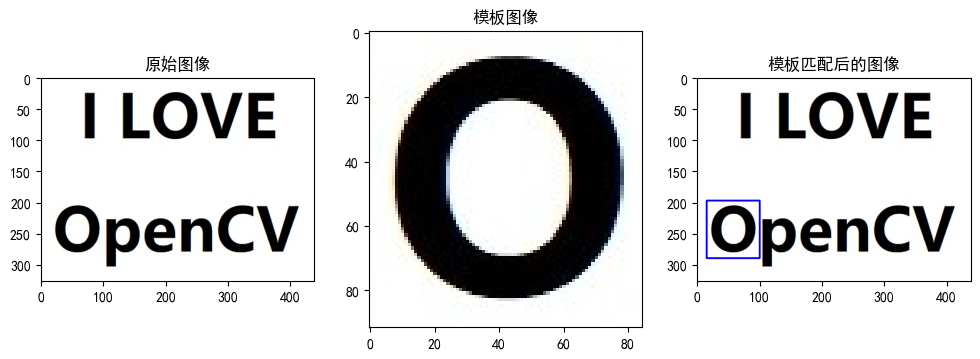

In [4]:
# 读取图像并判断是否读取成功
image = cv.imread(rootpath +'matchTemplate_2.jpg')
image1 = image.copy()
template = cv.imread(rootpath +'match_template_2.jpg')
if image is None or template is None:
    print('Failed to read matchTemplate_2.jpg or match_template_2.jpg')
    sys.exit
# 计算模板图像的高和宽
h, w = template.shape[:2]
# 进行图像模式匹配
result = cv.matchTemplate(image, template, method=cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
# 计算图像左上角、右下角坐标并画出匹配位置
left_top = max_loc
right_bottom = (left_top[0] + w, left_top[1] + h)
cv.rectangle(image, left_top, right_bottom, 255, 2)
# 展示结果
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(image1[:,:,[2,1,0]])
plt.subplot(1, 3, 2)
plt.title('模板图像')
plt.imshow(template[:,:,[2,1,0]])
plt.subplot(1, 3, 3)
plt.title('模板匹配后的图像')
plt.imshow(image[:,:,[2,1,0]])

输出结果可知，当前的算法只支持识别一个特征，无法实现识别多个特征